In [1]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.models import Sequential

2.4.0


In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from numpy import array
from numpy.random import uniform
from numpy import hstack
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [78]:
#read_file = pd.read_csv ('Book3.csv')
read_file = pd.read_csv ('d1.csv', index_col=0)
read_file.head()
dataset=read_file
dataset=dataset.dropna(axis='columns')
dataset


,Pressure,RF Power,Electrode Gap,CCl4,He,O2,Rate - Rp,Uniformity – U,Selectivity - Sox,Selectivity -
Run,,,,,,,,,,
1,300,300,1.8,100,200,20,3491,14.2,6.48,2.01
2,200,400,1.8,100,50,10,3884,3.9,5.98,1.91
3,200,400,1.2,150,200,20,4931,24.8,5.39,1.85
4,300,400,1.8,150,200,20,4726,6.6,5.97,2.11
5,200,400,1.2,150,50,10,5089,12.4,5.61,2.16
6,300,300,1.8,150,200,10,3452,6.5,6.55,2.28
7,300,400,1.8,100,50,20,5164,1.0,8.51,2.06
8,250,350,1.5,125,125,15,4108,8.9,5.74,1.89
9,200,300,1.8,150,200,20,3494,8.3,6.24,1.32


In [79]:
dataset['Rate - Rp'] = dataset['Rate - Rp']/100
dataset['Uniformity – U'] = dataset['Uniformity – U']*10
dataset

<ipython-input-79-360a22cd5d50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Rate - Rp'] = dataset['Rate - Rp']/100
<ipython-input-79-360a22cd5d50>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Uniformity – U'] = dataset['Uniformity – U']*10


,Pressure,RF Power,Electrode Gap,CCl4,He,O2,Rate - Rp,Uniformity – U,Selectivity - Sox,Selectivity -
Run,,,,,,,,,,
1,300,300,1.8,100,200,20,34.91,142.0,6.48,2.01
2,200,400,1.8,100,50,10,38.84,39.0,5.98,1.91
3,200,400,1.2,150,200,20,49.31,248.0,5.39,1.85
4,300,400,1.8,150,200,20,47.26,66.0,5.97,2.11
5,200,400,1.2,150,50,10,50.89,124.0,5.61,2.16
6,300,300,1.8,150,200,10,34.52,65.0,6.55,2.28
7,300,400,1.8,100,50,20,51.64,10.0,8.51,2.06
8,250,350,1.5,125,125,15,41.08,89.0,5.74,1.89
9,200,300,1.8,150,200,20,34.94,83.0,6.24,1.32


In [80]:
X = dataset.iloc[:,0:-4]
dataset
X


,Pressure,RF Power,Electrode Gap,CCl4,He,O2
Run,,,,,,
1,300,300,1.8,100,200,20
2,200,400,1.8,100,50,10
3,200,400,1.2,150,200,20
4,300,400,1.8,150,200,20
5,200,400,1.2,150,50,10
6,300,300,1.8,150,200,10
7,300,400,1.8,100,50,20
8,250,350,1.5,125,125,15
9,200,300,1.8,150,200,20


In [81]:
Y = dataset.iloc[:,6:]
Y

,Rate - Rp,Uniformity – U,Selectivity - Sox,Selectivity -
Run,,,,
1,34.91,142.0,6.48,2.01
2,38.84,39.0,5.98,1.91
3,49.31,248.0,5.39,1.85
4,47.26,66.0,5.97,2.11
5,50.89,124.0,5.61,2.16
6,34.52,65.0,6.55,2.28
7,51.64,10.0,8.51,2.06
8,41.08,89.0,5.74,1.89
9,34.94,83.0,6.24,1.32


In [82]:
in_dim = X.shape[1]
out_dim = Y.shape[1]
Y

,Rate - Rp,Uniformity – U,Selectivity - Sox,Selectivity -
Run,,,,
1,34.91,142.0,6.48,2.01
2,38.84,39.0,5.98,1.91
3,49.31,248.0,5.39,1.85
4,47.26,66.0,5.97,2.11
5,50.89,124.0,5.61,2.16
6,34.52,65.0,6.55,2.28
7,51.64,10.0,8.51,2.06
8,41.08,89.0,5.74,1.89
9,34.94,83.0,6.24,1.32


In [83]:
xtrain, xtest, ytrain, ytest=train_test_split(X, Y, test_size=.20)

In [95]:
model = Sequential()
model.add(Dense(128, input_dim=in_dim, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(out_dim, activation="linear" ))
model.compile(loss="mse", optimizer="adam", metrics=['accuracy'])
 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               896       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 260       
Total params: 9,412
Trainable params: 9,412
Non-trainable params: 0
_________________________________________________________________


In [96]:
model.fit(xtrain, ytrain, epochs=100, batch_size=10, verbose=1)


Epoch 1/100
5/5 [==============================] - 0s 1ms/step - loss: 9318.0439 - accuracy: 0.0554
Epoch 2/100
5/5 [==============================] - 0s 1ms/step - loss: 6749.0228 - accuracy: 0.3823
Epoch 3/100
5/5 [==============================] - 0s 1ms/step - loss: 3154.8454 - accuracy: 0.7738
Epoch 4/100
5/5 [==============================] - 0s 1ms/step - loss: 3632.8735 - accuracy: 0.7585
Epoch 5/100
5/5 [==============================] - 0s 1ms/step - loss: 3621.6340 - accuracy: 0.7252
Epoch 6/100
5/5 [==============================] - 0s 1ms/step - loss: 2137.7839 - accuracy: 0.7571
Epoch 7/100
5/5 [==============================] - 0s 992us/step - loss: 2629.5590 - accuracy: 0.7724
Epoch 8/100
5/5 [==============================] - 0s 1ms/step - loss: 3491.4115 - accuracy: 0.7196
Epoch 9/100
5/5 [==============================] - 0s 1ms/step - loss: 2590.4301 - accuracy: 0.7155
Epoch 10/100
5/5 [==============================] - 0s 1ms/step - loss: 2070.3935 - accuracy: 0.75

In [87]:
import time
LOG_DIR = f"{int(time.time())}"

In [88]:
from tensorflow.keras import layers

In [89]:
def build_model(hp):
    model1 = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 10)):
        model1.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model1.add(layers.Dense(4))
    model1.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mse',
        metrics=['accuracy'])
    return model1

In [90]:
from tensorflow import keras
from kerastuner.tuners import RandomSearch
tuner = RandomSearch(
    build_model,
    objective='loss',
    max_trials=5,
    executions_per_trial=1,
    directory=LOG_DIR
   )

In [91]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [92]:
tuner.search(xtrain, ytrain,
             epochs=20,
             validation_data=(xtest, ytest))

Trial 5 Complete [00h 00m 01s]
loss: 1780.3736572265625

Best loss So Far: 1780.3736572265625
Total elapsed time: 00h 00m 09s
INFO:tensorflow:Oracle triggered exit


In [93]:
tuner.results_summary()

Results summary
Results in 1614785917/untitled_project
Showing 10 best trials
Objective(name='loss', direction='min')
Trial summary
Hyperparameters:
num_layers: 5
units_0: 64
units_1: 96
learning_rate: 0.01
units_2: 224
units_3: 160
units_4: 128
units_5: 224
units_6: 256
units_7: 96
units_8: 128
units_9: 192
Score: 1780.3736572265625
Trial summary
Hyperparameters:
num_layers: 6
units_0: 160
units_1: 32
learning_rate: 0.01
units_2: 32
units_3: 32
units_4: 32
units_5: 32
Score: 2330.30615234375
Trial summary
Hyperparameters:
num_layers: 10
units_0: 64
units_1: 32
learning_rate: 0.01
units_2: 128
units_3: 256
units_4: 96
units_5: 224
units_6: 96
units_7: 224
units_8: 160
units_9: 192
Score: 2656.332275390625
Trial summary
Hyperparameters:
num_layers: 8
units_0: 160
units_1: 32
learning_rate: 0.0001
units_2: 224
units_3: 192
units_4: 224
units_5: 160
units_6: 32
units_7: 32
Score: 3404.77001953125
Trial summary
Hyperparameters:
num_layers: 10
units_0: 192
units_1: 160
learning_rate: 0.0001

In [ ]:
pip install -q -U keras-tuner

In [ ]:
import sklearn
sorted( sklearn.metrics.SCORERS.keys())

In [97]:
ypred = model.predict(xtest)
ypred

array([[ 46.42473   , 191.23903   ,   7.425604  ,  -0.2664402 ],
       [ 41.961002  , 239.7751    ,   2.252018  ,   2.0463364 ],
       [ 43.106117  ,  15.647818  ,  11.148224  ,   3.0561144 ],
       [ 50.294514  ,  51.022743  ,   8.005756  ,   4.396776  ],
       [ 40.701183  ,  85.275154  ,   7.2968826 ,   0.9798853 ],
       [ 44.74733   , 103.59281   ,   8.816312  ,   0.9122297 ],
       [ 50.742054  ,  51.892696  ,   8.685592  ,   3.4530108 ],
       [ 31.763597  ,  24.717726  ,  10.181288  ,   0.6955592 ],
       [ 34.099552  , 126.5072    ,   8.348321  ,   2.379494  ],
       [ 32.752575  , 133.57541   ,   4.3601646 ,   3.8141186 ],
       [ 37.18418   ,  80.699265  ,  10.699227  ,   0.58714503]],
      dtype=float32)

In [98]:
ypred
ytest=ytest.to_numpy()

In [99]:
print("y1 MSE:%.4f" % mean_squared_error(ytest[:,0], ypred[:,0])) 
print("y2 MSE:%.4f" % mean_squared_error(ytest[:,1], ypred[:,1]))
print("y3 MSE:%.4f" % mean_squared_error(ytest[:,2], ypred[:,2]))
print("y4 MSE:%.4f" % mean_squared_error(ytest[:,3], ypred[:,3]))

y1 MSE:25.2267
y2 MSE:2379.9200
y3 MSE:5.0877
y4 MSE:2.2615


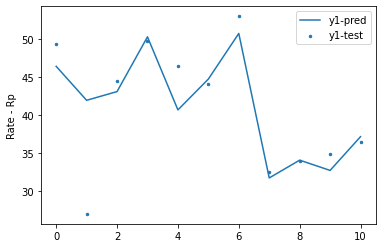

In [122]:
x_ax = range(len(xtest))
plt.scatter(x_ax, ytest[:,0], s=6,label="y1-test")
plt.plot(x_ax, ypred[:,0], label="y1-pred")
plt.ylabel("Rate - Rp")
plt.legend()


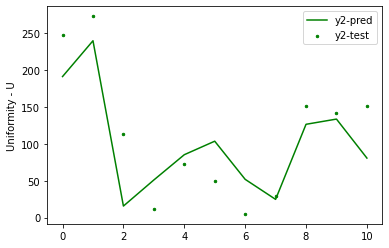

In [123]:
plt.scatter(x_ax, ytest[:,1],  s=6, label="y2-test", color='green')
plt.plot(x_ax, ypred[:,1], label="y2-pred",color='green')
plt.ylabel("Uniformity - U")
plt.legend()
plt.show()

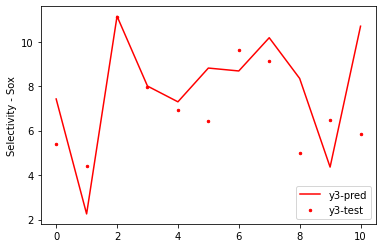

In [131]:
x_ax = range(len(xtest))
plt.scatter(x_ax, ytest[:,2],  s=6, label="y3-test",color='red')
plt.plot(x_ax, ypred[:,2], label="y3-pred", color='red')
plt.ylabel("Selectivity - Sox")
plt.legend()
plt.legend()



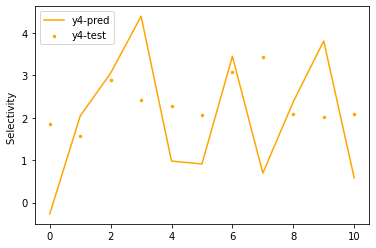

In [132]:
x_ax = range(len(xtest))
plt.scatter(x_ax, ytest[:,3],  s=6, label="y4-test",color='orange')
plt.plot(x_ax, ypred[:,3], label="y4-pred", color='orange')
plt.ylabel("Selectivity ")
plt.legend()
plt.legend()

In [28]:
model2 = Sequential()
model2.add(Dense(256, input_dim=in_dim, activation="relu"))
model2.add(Dense(64, activation="relu"))
model2.add(Dense(1))
model2.compile(loss="mse", optimizer="adam", metrics=['accuracy'])
 
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 256)               1792      
_________________________________________________________________
dense_14 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 65        
Total params: 18,305
Trainable params: 18,305
Non-trainable params: 0
_________________________________________________________________


In [70]:
print("y2 MSE:%.4f" % mean_squared_error(ytest[:,1].T, a.T))

y2 MSE:4797.5994
